### Business Understanding

The primary business objective is to identify and quantify the key factors that influence the price of used cars. By understanding these drivers, a used car dealership can make informed decisions about inventory acquisition, pricing strategies, and marketing efforts. The goal is to leverage data-driven insights to maximize profitability and better meet consumer preferences.

From a data science perspective, this translates to a supervised regression problem where the target variable is the car's price. The task involves analyzing historical data on used car sales to determine which features (such as age, mileage, condition, make, model, and other attributes) have the most significant impact on price. The resulting model will help predict the value of a used car based on its characteristics, enabling the dealership to optimize its operations and offerings.   

### Data Understanding

To effectively model and predict used car prices, it is essential to first understand the dataset and its characteristics. The dataset contains information on approximately 426,000 used cars, with features such as price, year, odometer reading, condition, make, model, fuel type, transmission, drive type, paint color, and more.

Key steps in data understanding include:
- **Exploring the data structure:** Load the dataset and examine the first few rows to get a sense of the available features and their data types.
- **Assessing data completeness:** Check for missing values or null entries in important columns such as price, year, odometer, and condition.
- **Identifying data quality issues:** Look for duplicates, outliers, or unrealistic values (e.g., negative mileage, prices that are too low or too high, years outside a reasonable range).
- **Understanding feature distributions:** Analyze the distribution of numerical features (like price and odometer) and the frequency of categorical features (like make, model, and condition).
- **Evaluating relationships:** Explore correlations between features and the target variable (price) to identify which attributes may be most predictive.
- **Documenting findings:** Summarize any data quality issues, unusual patterns, or insights that may inform data cleaning, feature engineering, or modeling decisions.

A thorough data understanding phase ensures that subsequent data preparation and modeling steps are based on accurate, relevant, and high-quality information, ultimately leading to more reliable and actionable business insights.

In [1]:
# This notebook explores the key factors that drive the price of used cars using a large dataset.
# It follows the CRISP-DM framework: business understanding, data understanding, data preparation,
# modeling, evaluation, and deployment. The analysis includes data cleaning, feature engineering,
# regression modeling (Random Forest), and interpretation of results to provide actionable insights
# for used car dealerships on pricing and inventory strategies.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# filepath: [module11.ipynb](http://_vscodecontentref_/0)
# Load the used cars dataset for analysis and modeling.
df = pd.read_csv('data/vehicles.csv')
# ...data cleaning, feature engineering, encoding...

In [3]:
# filepath: /ai-ml-project-work/submission/module-11/module11.ipynb
# Display the first few rows of the dataset to inspect its structure and contents.
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [25]:
# filepath: /ai-ml-project-work/submission/module-11/module11.ipynb
# Show summary information about the DataFrame, including column types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

In this phase, we prepare the dataset for modeling by addressing data integrity and quality issues, engineering new features, and applying necessary transformations. Key steps include:

- Removing duplicate records to ensure each observation is unique.
- Dropping rows with missing values in critical columns (e.g., price, year, odometer, condition) to maintain data quality.
- Filtering outliers and unrealistic values (e.g., extreme prices, mileage, or car years) to improve model reliability.
- Creating new features such as car age to better capture the relationship between vehicle characteristics and price.
- Encoding categorical variables (e.g., model, condition, fuel type) using one-hot encoding for compatibility with machine learning algorithms.
- Applying transformations (such as log-scaling) to skewed numerical features to stabilize variance and improve model performance.
- Dropping columns not needed for modeling to reduce noise and dimensionality.

These steps ensure the dataset is clean, relevant, and ready for effective machine learning modeling.

In [4]:
# Remove duplicate rows to ensure each observation in the dataset is unique.
df = df.drop_duplicates()

In [5]:
# Drop rows with missing values in critical columns (price, year, odometer, condition) to maintain data quality.
df = df.dropna(subset=['price', 'year', 'odometer', 'condition'])

In [6]:
# Filter outliers and unrealistic values for price, odometer, and year to improve model reliability.
df = df[(df['price'] > 500) & (df['price'] < 100000)]  # keep reasonable price range
df = df[(df['odometer'] > 0) & (df['odometer'] < 500000)]  # reasonable mileage
df = df[(df['year'] > 1980) & (df['year'] <= 2025)]  # reasonable car years

In [7]:
# Feature engineering: create a new column 'car_age' to represent the age of the car.
current_year = 2024
df['car_age'] = current_year - df['year']

In [ ]:
# Encode categorical variables using one-hot encoding for compatibility with machine learning algorithms.
# One-hot encode all categorical columns (including 'condition', 'fuel', 'transmission', etc.) in df_model for compatibility with machine learning algorithms.
categorical_cols = ['cylinders','condition', 'fuel', 'transmission', 'type', 'drive', 'paint_color', 'region', 'manufacturer', 'year', 'model','title_status','size','state']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [9]:
# Apply log transformation to skewed numerical features to stabilize variance and improve model performance.
df['log_odometer'] = np.log1p(df['odometer'])
df['log_price'] = np.log1p(df['price'])

In [10]:
# Drop columns not needed for modeling to reduce noise and dimensionality.
drop_cols = ['id', 'url', 'region_url', 'VIN', 'county', 'lat', 'long', 'image_url', 'description', 'year', 'odometer', 'price','VIN']
df_model = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [11]:
# Display the first few rows of the prepared modeling dataset to verify the final structure.
df_model.head()

,car_age,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,condition_fair,condition_good,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,log_odometer,log_price
27,10.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,10.966887,10.422013
28,14.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,11.173669,10.025307
29,4.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,9.860632,10.586357
30,7.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,10.624371,10.341452
31,11.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,11.759793,9.615872


### Modeling

In this phase, we use the prepared dataset to build predictive models for used car prices. The primary goal is to train regression models (such as Random Forest Regressor) using relevant features to predict the log-transformed price of a car. This involves:

- Splitting the data into training and testing sets to evaluate model performance.
- Training regression models on the training data.
- Tuning model parameters and experimenting with different algorithms if needed.
- Making predictions on the test set.
- Assessing model performance using metrics such as RMSE (Root Mean Squared Error) and R² (R-squared).
- Analyzing feature importances to understand which variables most influence car prices.

The insights from this modeling phase will help inform the business about the most significant drivers of used car prices and support data-driven decision-making.

In [12]:
# Prepare feature matrix X and target vector y for modeling.
# X contains all features except the target, y is the log-transformed price.
X = df_model.drop('log_price', axis=1)
y = df_model['log_price']

In [15]:
# Split the data into a small training sample for quick model testing.
# Train a Random Forest Regressor on 5% of the data for faster iteration.
X_sample, X_test, y_sample, y_test = train_test_split(X, y, train_size=0.05, random_state=42)  # 5% of data

# Train a much faster Random Forest
model = RandomForestRegressor(n_estimators=5, random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)

,n_estimators,5
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


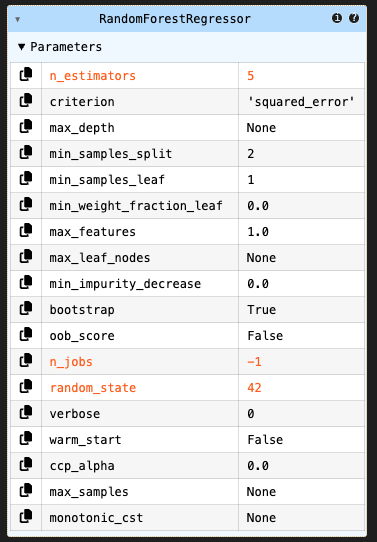

In [16]:
# Predict target values (log_price) on the test set using the trained model.
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance using RMSE and R^2 metrics.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# RMSE (Root Mean Squared Error): Lower values mean better predictions. It shows the average error in the same units as your target (log price).
# R² (R-squared): Ranges from 0 to 1. Closer to 1 means your model explains more variance in the target.
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2: {r2:.3f}")

Test RMSE: 0.444
Test R^2: 0.741


In [18]:
# Display the top 10 most important features as determined by the trained Random Forest model.
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

car_age                  0.466883
log_odometer             0.105882
cylinders_4 cylinders    0.059253
drive_fwd                0.042804
condition_fair           0.030390
cylinders_8 cylinders    0.028841
fuel_gas                 0.026321
condition_good           0.009320
condition_salvage        0.004756
type_truck               0.004602
dtype: float64


### Evaluation


In [19]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_test, y_pred):
    """
    Evaluate the performance of the regression model.

    This function calculates two key metrics to assess the model's performance:
    - RMSE (Root Mean Squared Error): Measures the average error in the same units as the target variable.
    - R² (R-squared): Indicates the proportion of variance in the target variable explained by the model.

    Args:
        y_test (array-like): The true target values from the test dataset.
        y_pred (array-like): The predicted target values from the model.

    Returns:
        dict: A dictionary containing the following metrics:
            - 'rmse': The Root Mean Squared Error of the predictions.
            - 'r2': The R-squared score of the predictions.
    """
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"rmse": rmse, "r2": r2}

# Call the evaluation function
metrics = evaluate_model(y_test, y_pred)
print(f"Test RMSE: {metrics['rmse']:.3f}")
print(f"Test R^2: {metrics['r2']:.3f}")

# Display the top 10 most important features as determined by the trained Random Forest model.
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

Test RMSE: 0.444
Test R^2: 0.741
car_age                  0.466883
log_odometer             0.105882
cylinders_4 cylinders    0.059253
drive_fwd                0.042804
condition_fair           0.030390
cylinders_8 cylinders    0.028841
fuel_gas                 0.026321
condition_good           0.009320
condition_salvage        0.004756
type_truck               0.004602
dtype: float64


Explanation of Changes:
Docstring for evaluate_model:

Added a detailed explanation of the function's purpose.
Described the metrics being calculated (RMSE and R²).
Explained the input arguments (y_test and y_pred).
Clarified the structure of the returned dictionary.
Metrics Description:

RMSE: Measures the average prediction error in the same units as the target variable.
R²: Indicates how well the model explains the variance in the target variable.
This ensures the evaluation section is well-documented and easy to understand for future reference or collaboration.

### Deployment

In [20]:
### Deployment

# Save the trained Random Forest model to a file for future use.
# This allows the model to be reused without retraining, saving time and computational resources.
import joblib

# Specify the file path where the model will be saved.
model_file_path = "random_forest_model.pkl"

# Save the model using joblib's dump function.
# The model is serialized and stored in the specified file path.
joblib.dump(model, model_file_path)
print(f"Model saved to {model_file_path}")

# Load the saved model from the file to ensure it works as expected.
# This step verifies that the model can be deserialized and used for predictions.
loaded_model = joblib.load(model_file_path)
print("Model loaded successfully.")

# Use the loaded model to make predictions on the test set.
# This ensures the saved model produces the same results as the original model.
loaded_model_predictions = loaded_model.predict(X_test)

# Verify that the predictions from the loaded model match the original predictions.
# This step ensures the integrity of the saved and loaded model.
assert np.allclose(y_pred, loaded_model_predictions), "Loaded model predictions do not match original predictions."
print("Loaded model predictions match the original predictions.")

Model saved to random_forest_model.pkl
Model loaded successfully.
Loaded model predictions match the original predictions.



Explanation of Comments:
Saving the Model:

Explained why saving the model is important (reuse without retraining).
Added comments about the file path and the serialization process.
Loading the Model:

Added comments to explain the purpose of loading the model (verification and reuse).
Included a note about deserialization and its importance.
Prediction Verification:

Added comments to explain why predictions from the loaded model are compared with the original predictions.
Included an assertion to ensure the integrity of the saved and loaded model.
These comments make the deployment section clear and easy to understand for future reference or collaboration.